In [1]:
!apt install unzip


Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.


In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!unzip  '/content/drive/MyDrive/deep/dataset.zip' -d destination.zip


Streaming output truncated to the last 5000 lines.
  inflating: destination.zip/chest_xray/train/NORMAL/NORMAL-2558319-0001.jpeg  
  inflating: destination.zip/chest_xray/train/NORMAL/NORMAL-2558319-0002.jpeg  
  inflating: destination.zip/chest_xray/train/NORMAL/NORMAL-2559035-0001.jpeg  
  inflating: destination.zip/chest_xray/train/NORMAL/NORMAL-2559035-0002.jpeg  
  inflating: destination.zip/chest_xray/train/NORMAL/NORMAL-2565226-0001.jpeg  
  inflating: destination.zip/chest_xray/train/NORMAL/NORMAL-2568157-0001.jpeg  
  inflating: destination.zip/chest_xray/train/NORMAL/NORMAL-2597757-0001.jpeg  
  inflating: destination.zip/chest_xray/train/NORMAL/NORMAL-2597757-0002.jpeg  
  inflating: destination.zip/chest_xray/train/NORMAL/NORMAL-263932-0001.jpeg  
  inflating: destination.zip/chest_xray/train/NORMAL/NORMAL-2646645-0001.jpeg  
  inflating: destination.zip/chest_xray/train/NORMAL/NORMAL-2646923-0001.jpeg  
  inflating: destination.zip/chest_xray/train/NORMAL/NORMAL-2655558-00

In [4]:
import random
import numpy as np
import tensorflow as tf

random.seed(43)
np.random.seed(43)
tf.random.set_seed(43)

In [84]:
from tensorflow import keras

base_model = keras.applications.VGG16	(
    weights='imagenet',  
    input_shape=(224, 224, 3),
    include_top=False)

In [85]:
base_model.trainable = False

In [86]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [87]:
# from threading import active_count

x = keras.layers.Flatten()(base_model.output)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.3)(x)
# # x = keras.layers.Dense(256, activation='relu')(x)
# # x = keras.layers.Dropout(0.3)(x)
# x = keras.layers.Dense(128, activation='relu')(x)
# x = keras.layers.Dropout(0.3)(x)
# x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dense(2,activation='softmax')(x)
model = keras.Model( base_model.input, x) 

# model = keras.Model(inputs, outputs)

In [88]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

## Loading an Image
We will start by loading in an image and displaying it

(2094, 2194)


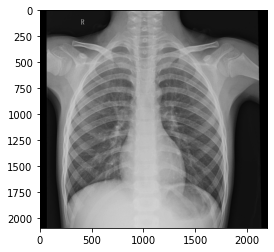

In [78]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image , cmap='gray')
show_image("/content/destination.zip/chest_xray/test/NORMAL/NORMAL-1049278-0001.jpeg")

## Augment the Data

In [89]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(
    samplewise_center=True,  
    rotation_range=10, 
    zoom_range=0.2,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    horizontal_flip=True,  
    vertical_flip=False,
)  

datagen_valid = ImageDataGenerator(samplewise_center=True)

## Loading the Data

In [90]:
train_it = datagen_train.flow_from_directory(
    "/content/destination.zip/chest_xray/train/",
    target_size=(224, 224),
    batch_size=64,
)

valid_it = datagen_valid.flow_from_directory(
    "/content/destination.zip/chest_xray/test/",
    target_size=(224, 224),

    batch_size=64,
)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Compile Model

In [91]:

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=keras.optimizers.Adam(0.0010))

In [20]:
# model = keras.models.load_model('/content/drive/MyDrive/deep/xray_model')

In [92]:
from tensorflow.keras.callbacks import  ModelCheckpoint
filepath="/content/drive/MyDrive/deep/weights"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [93]:
history=model.fit(train_it,
          validation_data=valid_it,
          steps_per_epoch=train_it.samples/train_it.batch_size,
          validation_steps=valid_it.samples/valid_it.batch_size,
          epochs=10,callbacks=[checkpoint])

Epoch 1/10
82/81 [==============================] - ETA: 0s - loss: 2.7547 - accuracy: 0.9075
Epoch 1: val_accuracy improved from -inf to 0.92308, saving model to /content/drive/MyDrive/deep/weights
INFO:tensorflow:Assets written to: /content/drive/MyDrive/deep/weights/assets
81/81 [==============================] - 114s 1s/step - loss: 2.7547 - accuracy: 0.9075 - val_loss: 0.2394 - val_accuracy: 0.9231
Epoch 2/10
82/81 [==============================] - ETA: 0s - loss: 0.1660 - accuracy: 0.9459
Epoch 2: val_accuracy improved from 0.92308 to 0.93910, saving model to /content/drive/MyDrive/deep/weights
INFO:tensorflow:Assets written to: /content/drive/MyDrive/deep/weights/assets
81/81 [==============================] - 115s 1s/step - loss: 0.1660 - accuracy: 0.9459 - val_loss: 0.1727 - val_accuracy: 0.9391
Epoch 3/10
82/81 [==============================] - ETA: 0s - loss: 0.1422 - accuracy: 0.9499
Epoch 3: val_accuracy improved from 0.93910 to 0.94551, saving model to /content/drive/My

In [94]:
# model.save('/content/drive/MyDrive/deep/xray_model3')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/deep/xray_model3/assets


In [95]:
model.evaluate(valid_it, steps=valid_it.samples/valid_it.batch_size)

9/9 [==============================] - 7s 689ms/step - loss: 0.1079 - accuracy: 0.9696


[0.10788528621196747, 0.9695512652397156]

## predict  Image

In [96]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image,cmap='gray')

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

array([[9.9972671e-01, 2.7328203e-04]], dtype=float32)

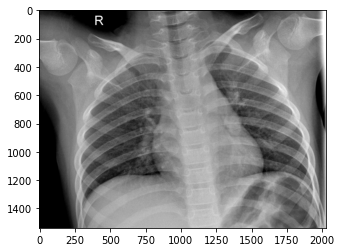

In [98]:
out = make_predictions("/content/destination.zip/chest_xray/test/NORMAL/NORMAL-1368583-0001.jpeg")
out




In [99]:
def X_rayPredict(image_path):
    preds = make_predictions(image_path)
    if preds[0][1] < 0.5:
        print(f"{preds[0][0] *100:0.4f}% Normal")
    else:
        print(f"{preds[0][1] *100:0.4f}% PNEUMONIA")

99.9932% PNEUMONIA


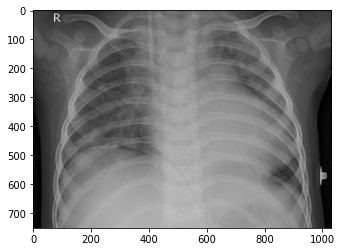

In [100]:
X_rayPredict("/content/destination.zip/chest_xray/test/PNEUMONIA/BACTERIA-1135262-0003.jpeg")

90.6234% Normal


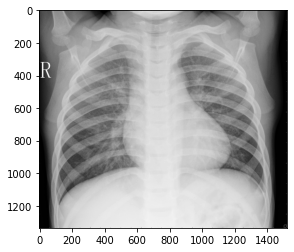

In [101]:
X_rayPredict("/content/destination.zip/chest_xray/test/NORMAL/NORMAL-1283091-0001.jpeg")

99.4236% Normal


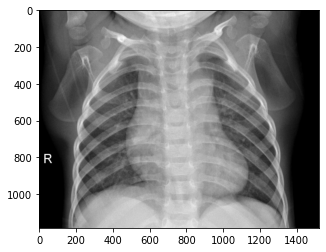

In [102]:

X_rayPredict("/content/destination.zip/chest_xray/test/NORMAL/NORMAL-11419-0001.jpeg")


100.0000% PNEUMONIA


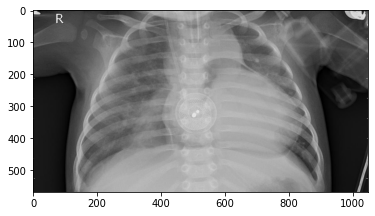

In [103]:
X_rayPredict("/content/destination.zip/chest_xray/test/PNEUMONIA/BACTERIA-1768914-0001.jpeg")
